# Assignment-11-Text Mining-02-Amazon Product Reviews

1) Extract reviews of any product from ecommerce website like amazon,
2) Perform emotion mining

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('extract_reviews_test2.csv')
reviews

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Soak up option not...
1,3.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I bought this wash...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n excellent product ...
3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n GOOD\n \n
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This Machine is ex...
5,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It's been six mont...
6,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \n
7,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Excellent\n \n
8,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \n
9,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Excellent product....


## Text Preprocessing

In [3]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Soak up option not provided in this model, otherwise is good...',
 "I bought this washing machine in 2021 and have been using it for over 1.5 yrs without any issues. however recently it started making noise as the drum was hitting the side of the body. Called up service center and it took them more than a week and a few follow up calls to send their engineer. He saw the video that I had taken and immediately confirmed that suspension had gone bad. The machine comes with 3 suspensions and I was surprised to find that all three suspensions had gone bad. The suspension look very slim and I am not sure if they would last more than 2 yrs again. He mentioned that possible reason for suspension to go bad so soon, could be mixed load. For example along with bed spreads adding a few towels, shirt etc. We generally don't do that, also we went for a higher capacity washing machine, however it takes less than capacity quoted. If you want 5 kgs of clothes to be washed, please buy washing machine 

In [4]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"Soak up option not provided in this model, otherwise is good... I bought this washing machine in 2021 and have been using it for over 1.5 yrs without any issues. however recently it started making noise as the drum was hitting the side of the body. Called up service center and it took them more than a week and a few follow up calls to send their engineer. He saw the video that I had taken and immediately confirmed that suspension had gone bad. The machine comes with 3 suspensions and I was surprised to find that all three suspensions had gone bad. The suspension look very slim and I am not sure if they would last more than 2 yrs again. He mentioned that possible reason for suspension to go bad so soon, could be mixed load. For example along with bed spreads adding a few towels, shirt etc. We generally don't do that, also we went for a higher capacity washing machine, however it takes less than capacity quoted. If you want 5 kgs of clothes to be washed, please buy washing machine with 

In [5]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Soak up option not provided in this model otherwise is good I bought this washing machine in 2021 and have been using it for over 15 yrs without any issues however recently it started making noise as the drum was hitting the side of the body Called up service center and it took them more than a week and a few follow up calls to send their engineer He saw the video that I had taken and immediately confirmed that suspension had gone bad The machine comes with 3 suspensions and I was surprised to find that all three suspensions had gone bad The suspension look very slim and I am not sure if they would last more than 2 yrs again He mentioned that possible reason for suspension to go bad so soon could be mixed load For example along with bed spreads adding a few towels shirt etc We generally dont do that also we went for a higher capacity washing machine however it takes less than capacity quoted If you want 5 kgs of clothes to be washed please buy washing machine with a capacity of 10Kg T

In [6]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Soak', 'up', 'option', 'not', 'provided', 'in', 'this', 'model', 'otherwise', 'is', 'good', 'I', 'bought', 'this', 'washing', 'machine', 'in', '2021', 'and', 'have', 'been', 'using', 'it', 'for', 'over', '15', 'yrs', 'without', 'any', 'issues', 'however', 'recently', 'it', 'started', 'making', 'noise', 'as', 'the', 'drum', 'was', 'hitting', 'the', 'side', 'of', 'the', 'body', 'Called', 'up', 'service', 'center']


In [8]:
len(text_tokens)

468

In [9]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Soak', 'option', 'provided', 'model', 'otherwise', 'good', 'bought', 'washing', 'machine', '2021', 'using', '15', 'yrs', 'without', 'issues', 'however', 'recently', 'started', 'making', 'noise', 'drum', 'hitting', 'side', 'body', 'Called', 'service', 'center', 'took', 'week', 'follow', 'calls', 'send', 'engineer', 'He', 'saw', 'video', 'taken', 'immediately', 'confirmed', 'suspension', 'gone', 'bad', 'machine', 'comes', '3', 'suspensions', 'surprised', 'find', 'three', 'suspensions', 'gone', 'bad', 'suspension', 'look', 'slim', 'sure', 'would', 'last', '2', 'yrs', 'He', 'mentioned', 'possible', 'reason', 'suspension', 'go', 'bad', 'soon', 'could', 'mixed', 'load', 'For', 'example', 'along', 'bed', 'spreads', 'adding', 'towels', 'shirt', 'etc', 'We', 'generally', 'dont', 'also', 'went', 'higher', 'capacity', 'washing', 'machine', 'however', 'takes', 'less', 'capacity', 'quoted', 'If', 'want', '5', 'kgs', 'clothes', 'washed', 'please', 'buy', 'washing', 'machine', 'capacity', '10Kg', '

In [10]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['soak', 'option', 'provided', 'model', 'otherwise', 'good', 'bought', 'washing', 'machine', '2021', 'using', '15', 'yrs', 'without', 'issues', 'however', 'recently', 'started', 'making', 'noise', 'drum', 'hitting', 'side', 'body', 'called', 'service', 'center', 'took', 'week', 'follow', 'calls', 'send', 'engineer', 'he', 'saw', 'video', 'taken', 'immediately', 'confirmed', 'suspension', 'gone', 'bad', 'machine', 'comes', '3', 'suspensions', 'surprised', 'find', 'three', 'suspensions', 'gone', 'bad', 'suspension', 'look', 'slim', 'sure', 'would', 'last', '2', 'yrs', 'he', 'mentioned', 'possible', 'reason', 'suspension', 'go', 'bad', 'soon', 'could', 'mixed', 'load', 'for', 'example', 'along', 'bed', 'spreads', 'adding', 'towels', 'shirt', 'etc', 'we', 'generally', 'dont', 'also', 'went', 'higher', 'capacity', 'washing', 'machine', 'however', 'takes', 'less', 'capacity', 'quoted', 'if', 'want', '5', 'kgs', 'clothes', 'washed', 'please', 'buy', 'washing', 'machine', 'capacity', '10kg', '

In [11]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['soak', 'option', 'provid', 'model', 'otherwis', 'good', 'bought', 'wash', 'machin', '2021', 'use', '15', 'yr', 'without', 'issu', 'howev', 'recent', 'start', 'make', 'nois', 'drum', 'hit', 'side', 'bodi', 'call', 'servic', 'center', 'took', 'week', 'follow', 'call', 'send', 'engin', 'he', 'saw', 'video', 'taken', 'immedi', 'confirm', 'suspens', 'gone', 'bad', 'machin', 'come', '3', 'suspens', 'surpris', 'find', 'three', 'suspens', 'gone', 'bad', 'suspens', 'look', 'slim', 'sure', 'would', 'last', '2', 'yr', 'he', 'mention', 'possibl', 'reason', 'suspens', 'go', 'bad', 'soon', 'could', 'mix', 'load', 'for', 'exampl', 'along', 'bed', 'spread', 'ad', 'towel', 'shirt', 'etc', 'we', 'gener', 'dont', 'also', 'went', 'higher', 'capac', 'wash', 'machin', 'howev', 'take', 'less', 'capac', 'quot', 'if', 'want', '5', 'kg', 'cloth', 'wash', 'pleas', 'buy', 'wash', 'machin', 'capac', '10kg', 'machin', 'super', 'silent', 'remov', 'dirt', 'well', 'howev', 'doubt', 'long', 'term', 'reliabl', 'as', '

In [12]:
# Lemmatization
nlp=spacy.load('en_core_web_md')
doc=nlp(' '.join(lower_words))
print(doc)

soak option provided model otherwise good bought washing machine 2021 using 15 yrs without issues however recently started making noise drum hitting side body called service center took week follow calls send engineer he saw video taken immediately confirmed suspension gone bad machine comes 3 suspensions surprised find three suspensions gone bad suspension look slim sure would last 2 yrs he mentioned possible reason suspension go bad soon could mixed load for example along bed spreads adding towels shirt etc we generally dont also went higher capacity washing machine however takes less capacity quoted if want 5 kgs clothes washed please buy washing machine capacity 10kg machine super silent removes dirt well however doubts long term reliability as reference earlier bosch lasted almost 21 yrs excellent product bought amazon got delivery next day whenever buy product like refrigerator washing machine tvs live third floor fourth floor second floor so make sure check product downstairs ca

In [13]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['soak', 'option', 'provide', 'model', 'otherwise', 'good', 'buy', 'washing', 'machine', '2021', 'use', '15', 'yr', 'without', 'issue', 'however', 'recently', 'start', 'make', 'noise', 'drum', 'hit', 'side', 'body', 'call', 'service', 'center', 'take', 'week', 'follow', 'call', 'send', 'engineer', 'he', 'see', 'video', 'take', 'immediately', 'confirm', 'suspension', 'go', 'bad', 'machine', 'come', '3', 'suspension', 'surprise', 'find', 'three', 'suspension', 'go', 'bad', 'suspension', 'look', 'slim', 'sure', 'would', 'last', '2', 'yr', 'he', 'mention', 'possible', 'reason', 'suspension', 'go', 'bad', 'soon', 'could', 'mix', 'load', 'for', 'example', 'along', 'bed', 'spread', 'add', 'towel', 'shirt', 'etc', 'we', 'generally', 'do', 'not', 'also', 'go', 'high', 'capacity', 'washing', 'machine', 'however', 'take', 'less', 'capacity', 'quote', 'if', 'want', '5', 'kg', 'clothe', 'wash', 'please', 'buy', 'washing', 'machine', 'capacity', '10', 'kg', 'machine', 'super', 'silent', 'remove', 'd

In [14]:
clean_reviews=' '.join(lemmas)
clean_reviews

'soak option provide model otherwise good buy washing machine 2021 use 15 yr without issue however recently start make noise drum hit side body call service center take week follow call send engineer he see video take immediately confirm suspension go bad machine come 3 suspension surprise find three suspension go bad suspension look slim sure would last 2 yr he mention possible reason suspension go bad soon could mix load for example along bed spread add towel shirt etc we generally do not also go high capacity washing machine however take less capacity quote if want 5 kg clothe wash please buy washing machine capacity 10 kg machine super silent remove dirt well however doubt long term reliability as reference early bosch last almost 21 yr excellent product buy amazon get delivery next day whenever buy product like refrigerator washing machine tvs live third floor fourth floor second floor so make sure check product downstairs case product damage like dent break scratch itso return do

## Feature Extaction

### 1. Using CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [16]:
print(cv.vocabulary_)

{'soak': 147, 'option': 114, 'provide': 121, 'model': 102, 'otherwise': 115, 'good': 63, 'buy': 21, 'washing': 175, 'machine': 96, '2021': 2, 'use': 168, '15': 1, 'yr': 184, 'without': 180, 'issue': 79, 'however': 72, 'recently': 125, 'start': 151, 'make': 97, 'noise': 107, 'drum': 46, 'hit': 70, 'side': 142, 'body': 16, 'call': 22, 'service': 140, 'center': 27, 'take': 157, 'week': 177, 'follow': 57, 'send': 139, 'engineer': 49, 'he': 65, 'see': 138, 'video': 171, 'immediately': 74, 'confirm': 33, 'suspension': 156, 'go': 62, 'bad': 14, 'come': 31, 'surprise': 155, 'find': 55, 'three': 162, 'look': 94, 'slim': 145, 'sure': 154, 'would': 183, 'last': 84, 'mention': 99, 'possible': 117, 'reason': 123, 'soon': 148, 'could': 35, 'mix': 101, 'load': 91, 'for': 58, 'example': 53, 'along': 8, 'bed': 15, 'spread': 149, 'add': 5, 'towel': 165, 'shirt': 141, 'etc': 51, 'we': 176, 'generally': 60, 'do': 42, 'not': 109, 'also': 9, 'high': 68, 'capacity': 23, 'less': 86, 'quote': 122, 'if': 73, 'w

In [17]:
print(cv.get_feature_names()[150:300])

['stand', 'start', 'still', 'super', 'sure', 'surprise', 'suspension', 'take', 'term', 'third', 'this', 'though', 'three', 'timing', 'totally', 'towel', 'tvs', 'update', 'use', 'vanilla', 'vibration', 'video', 'visit', 'want', 'wash', 'washing', 'we', 'week', 'well', 'whenever', 'without', 'work', 'worth', 'would', 'yr']


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
print(reviewscv.toarray().shape)

(272, 185)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [20]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [21]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['almost', 'along', 'also', 'amazon', 'bad', 'bosch', 'but', 'buy', 'call', 'capacity', 'could', 'downstairs', 'excellent', 'floor', 'go', 'good', 'he', 'however', 'installation', 'issue', 'kg', 'last', 'like', 'machine', 'make', 'next', 'noise', 'noiseless', 'not', 'offer', 'only', 'open', 'opt', 'option', 'otherwise', 'please', 'possible', 'process', 'product', 'properly', 'provide', 'quote', 'reason', 'receive', 'recently', 'recommend', 'reference', 'refrigerator', 'regular', 'reliability', 'remove', 'request', 'resolve', 'return', 'scratch', 'second', 'see', 'send', 'service', 'shirt', 'side', 'silent', 'six', 'slim', 'so', 'soak', 'soon', 'spread', 'stand', 'start', 'still', 'sure', 'suspension', 'take', 'third', 'this', 'though', 'three', 'timing', 'totally', 'towel', 'tvs', 'update', 'use', 'vanilla', 'vibration', 'video', 'visit', 'want', 'wash', 'washing', 'we', 'week', 'well', 'whenever', 'without', 'work', 'worth', 'would', 'yr']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0

### 3. TF-IDF Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [23]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '15', '2021', '2030min', '21', 'add', 'ahead', 'almost', 'along', 'also', 'always', 'amazing', 'amazon', 'as', 'bad', 'bed', 'body', 'bosch', 'break', 'bring', 'but', 'buy', 'call', 'capacity', 'careof', 'case', 'cautious', 'center', 'check', 'city', 'clothe', 'come', 'company', 'confirm', 'contact', 'could', 'damage', 'day', 'delivery', 'dent', 'design', 'dirt', 'do', 'door', 'doubt', 'downstairs', 'drum', 'duty', 'early', 'engineer', 'equip', 'etc', 'exactly', 'example', 'excellent', 'find', 'floor', 'follow', 'for', 'fourth', 'generally', 'get', 'go', 'good', 'hand', 'he', 'hear', 'heavy', 'high', 'highly', 'hit', 'hold', 'however', 'if', 'immediately', 'improve', 'inform', 'initially', 'installation', 'issue', 'its', 'itso', 'keep', 'kg', 'last', 'later', 'less', 'level', 'life', 'like', 'live', 'load', 'log', 'long', 'look', 'low', 'machine', 'make', 'mean', 'mention', 'metro', 'mix', 'model', 'moisture', 'month', 'need', 'next', 'noise', 'noiseless', 'not', 'offer', 'only'

### Generate Word Cloud

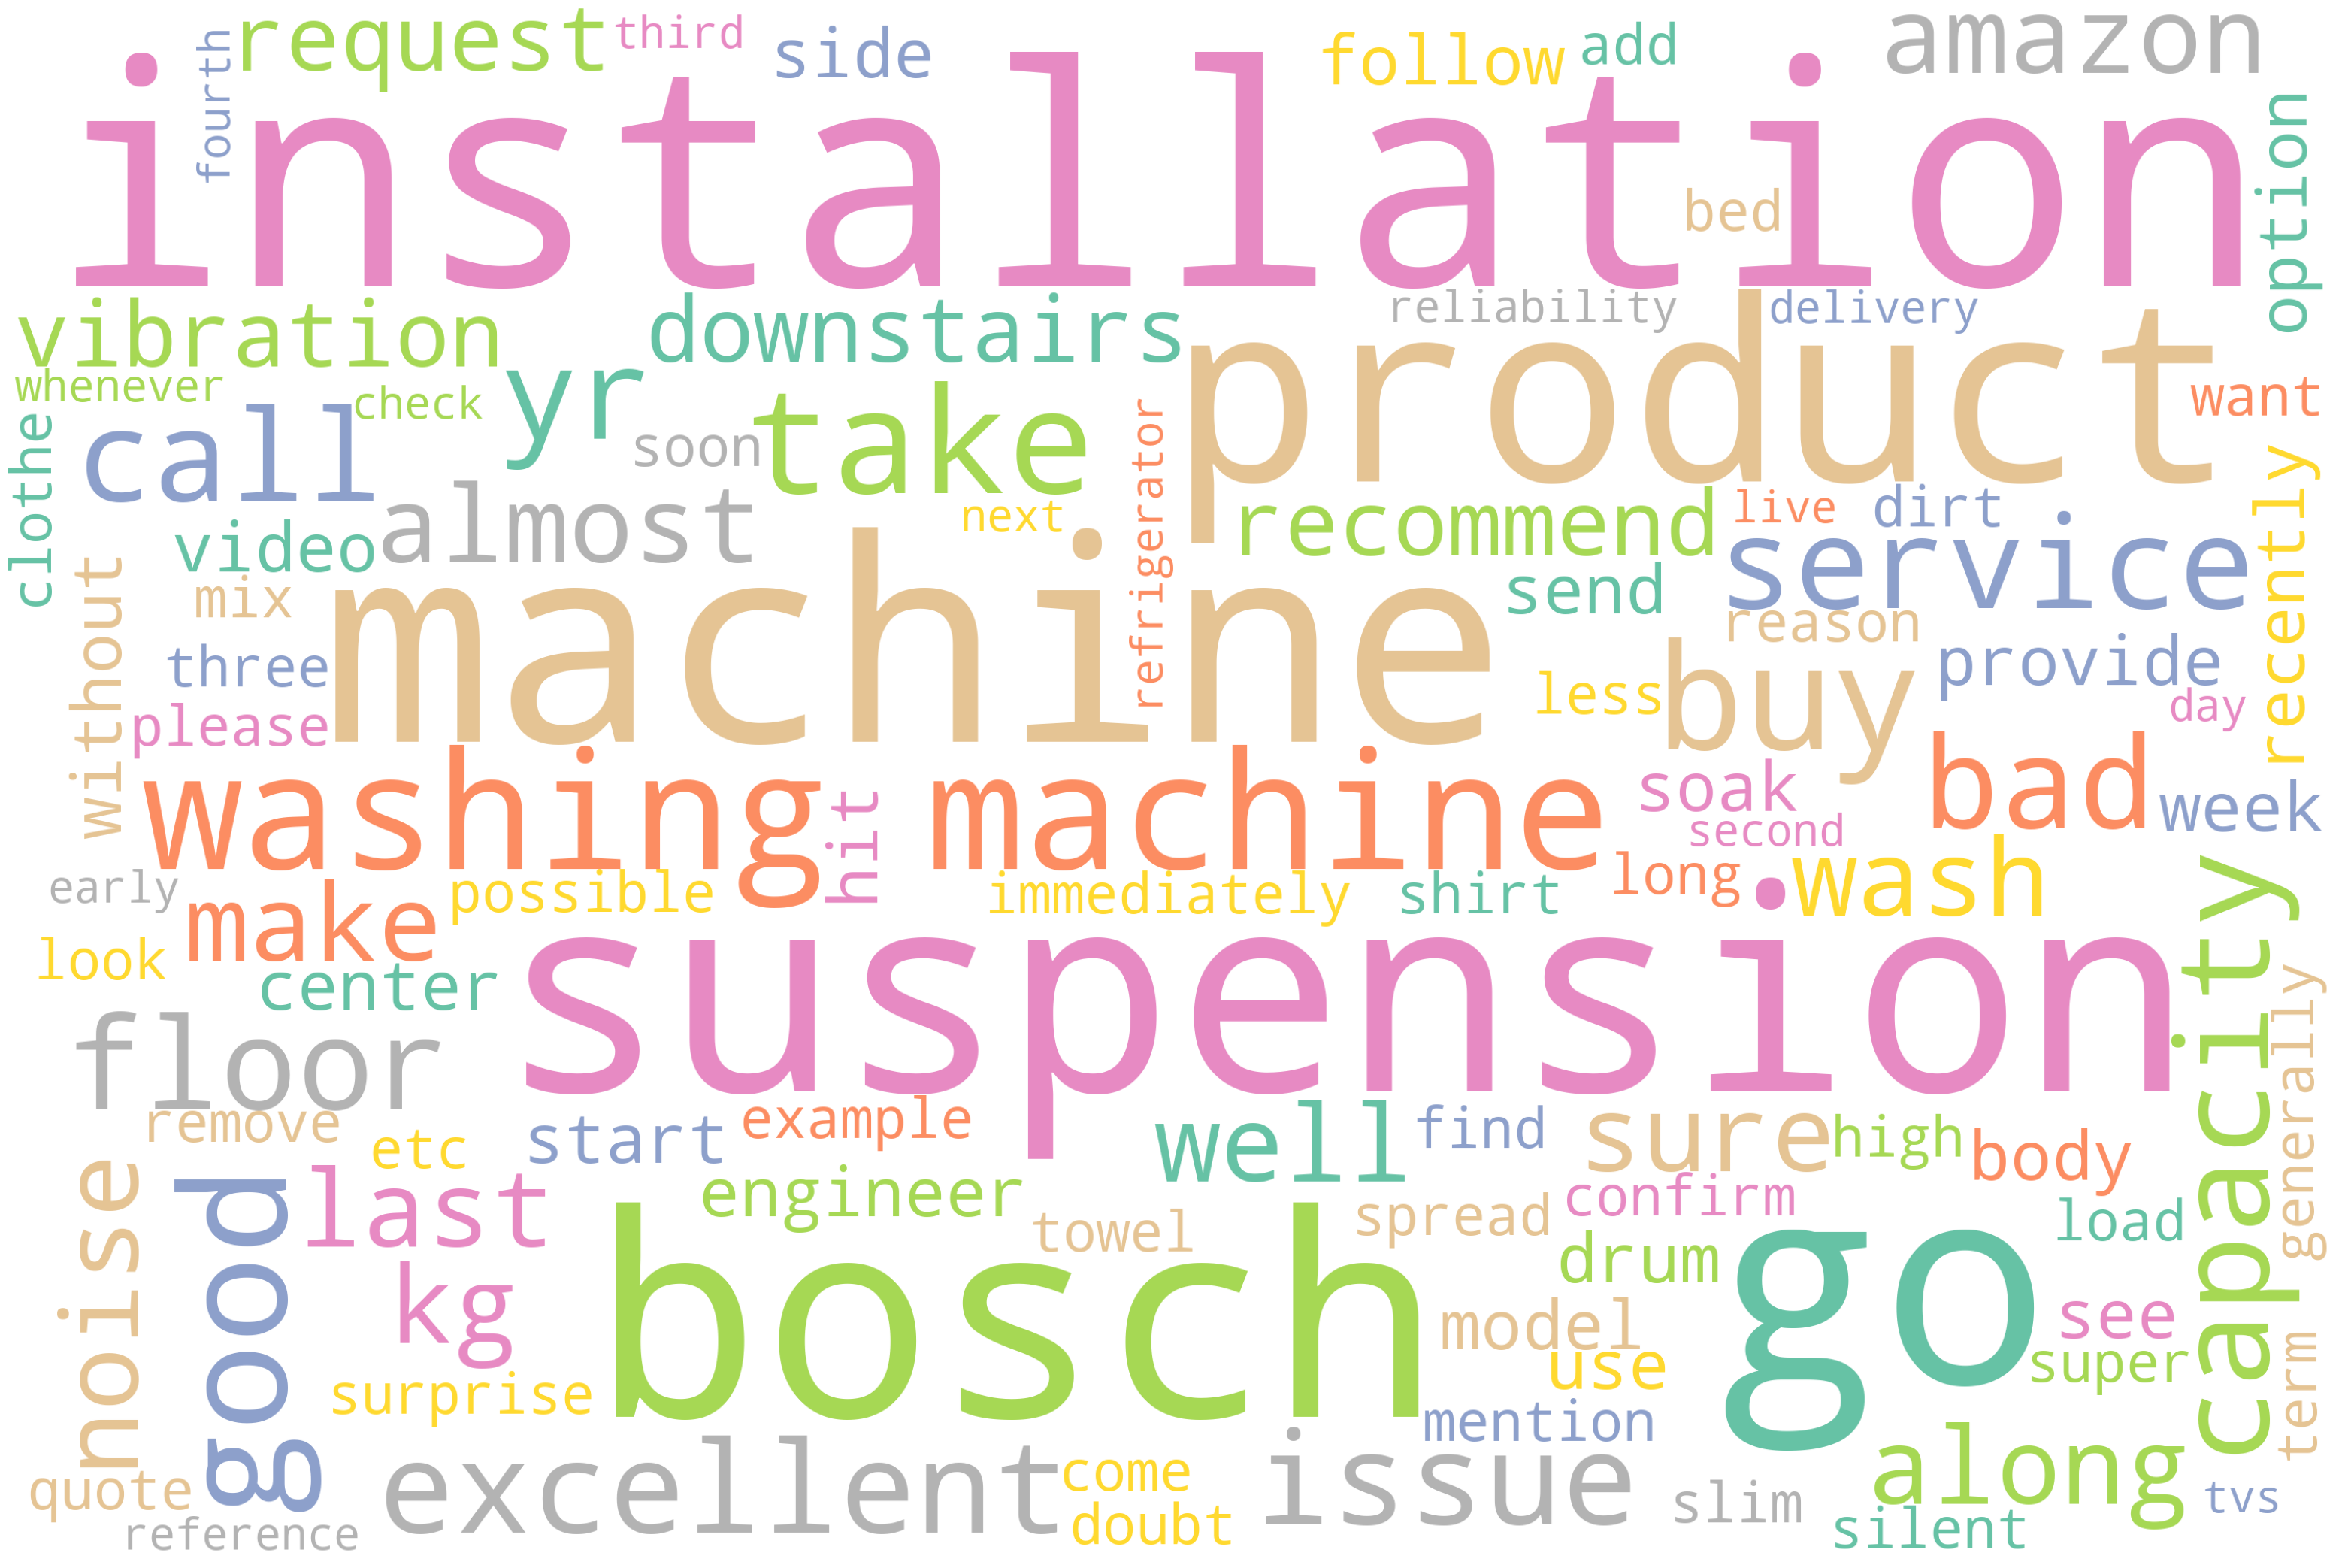

In [24]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [26]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_md')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [27]:
for token in doc_block[100:200]:
    print(token,token.pos_)

wash NOUN
please INTJ
buy VERB
washing NOUN
machine NOUN
capacity NOUN
10 NUM
kg NOUN
machine NOUN
super ADV
silent ADJ
remove VERB
dirt NOUN
well ADV
however ADV
doubt VERB
long ADJ
term NOUN
reliability NOUN
as ADP
reference NOUN
early ADJ
bosch PROPN
last ADJ
almost ADV
21 NUM
yr NOUN
excellent ADJ
product NOUN
buy VERB
amazon NOUN
get VERB
delivery NOUN
next ADJ
day NOUN
whenever SCONJ
buy VERB
product NOUN
like ADP
refrigerator NOUN
washing NOUN
machine NOUN
tvs PROPN
live VERB
third ADJ
floor NOUN
fourth ADJ
floor NOUN
second ADJ
floor NOUN
so ADV
make VERB
sure ADJ
check VERB
product NOUN
downstairs NOUN
case NOUN
product NOUN
damage NOUN
like ADP
dent NOUN
break NOUN
scratch PROPN
itso PROPN
return VERB
downstairs ADV
good ADJ
this DET
machine NOUN
exactly ADV
hear VERB
robust ADJ
heavy ADJ
duty NOUN
still ADV
almost ADV
noiseless NOUN
but CCONJ
installation NOUN
service NOUN
offer VERB
amazon NOUN
though SCONJ
process NOUN
well INTJ
design NOUN
hand NOUN
hold VERB
receive VERB

In [28]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['dent', 'break', 'return', 'machine', 'hear', 'duty', 'noiseless', 'installation', 'service', 'offer', 'amazon', 'process', 'design', 'hand', 'hold', 'receive', 'update', 'visit', 'timing', 'installation', 'vanilla', 'mean', 'request', 'bring', 'stand', 'washing', 'machine', 'equip', 'call', 'bosch', 'inform', 'request', 'installation', 'bosch', 'recommend', 'installation', 'city', 'go', 'installation', 'month', 'work', 'noise', 'vibration', 'machine', 'level', 'log', 'life', 'machine', 'take', 'careof', 'vibration', 'open', 'door', 'wash', 'keep', 'moisture', 'product', 'recommend', 'issue', 'bosch', 'improve', 'installation', 'service', 'issue', 'resolve', 'contact', 'company']


In [29]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,machine,10
1,installation,6
2,washing,5
3,suspension,5
4,go,5
5,product,5
6,buy,4
7,take,4
8,yr,3
9,issue,3


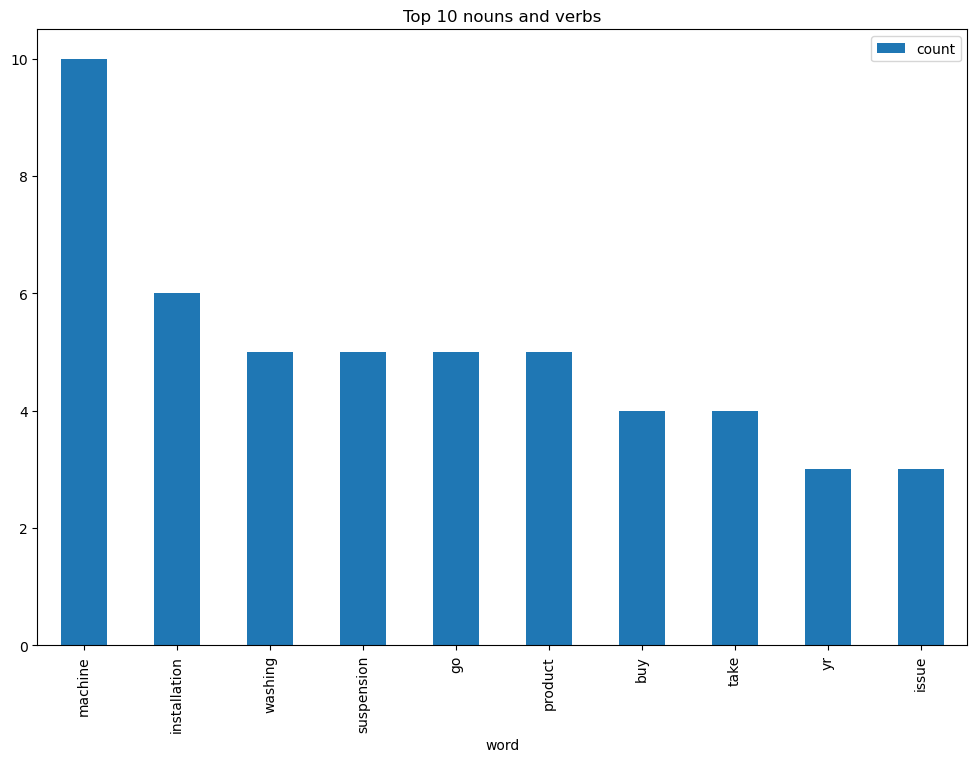

In [30]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [31]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Soak up option not provided in this model, otherwise is good...',
 'I bought this washing machine in 2021 and have been using it for over 1.5 yrs without any issues.',
 'however recently it started making noise as the drum was hitting the side of the body.',
 'Called up service center and it took them more than a week and a few follow up calls to send their engineer.',
 'He saw the video that I had taken and immediately confirmed that suspension had gone bad.',
 'The machine comes with 3 suspensions and I was surprised to find that all three suspensions had gone bad.',
 'The suspension look very slim and I am not sure if they would last more than 2 yrs again.',
 'He mentioned that possible reason for suspension to go bad so soon, could be mixed load.',
 'For example along with bed spreads adding a few towels, shirt etc.',
 "We generally don't do that, also we went for a higher capacity washing machine, however it takes less than capacity quoted.",
 'If you want 5 kgs of clothes to be

In [34]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"Soak up option not provided in this model, oth..."
1,I bought this washing machine in 2021 and have...
2,however recently it started making noise as th...
3,Called up service center and it took them more...
4,He saw the video that I had taken and immediat...
5,The machine comes with 3 suspensions and I was...
6,The suspension look very slim and I am not sur...
7,He mentioned that possible reason for suspensi...
8,For example along with bed spreads adding a fe...
9,"We generally don't do that, also we went for a..."


In [36]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [37]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [39]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [40]:
# manual testing
calculate_sentiment(text='good service')

3

In [41]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      3
1      0
2      0
3      0
4     -3
5     -3
6      0
7     -3
8      0
9      0
10     2
11     1
12    -1
13     3
14     2
15     0
16    -1
17     5
18     0
19     0
20     2
21     4
22    -1
23    14
24     2
25     2
26     2
Name: sentiment_value, dtype: int64

In [42]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     11
1     19
2     16
3     22
4     16
5     19
6     19
7     16
8     12
9     21
10    19
11    10
12     8
13    16
14    26
15     4
16    29
17    17
18    28
19    43
20    22
21     6
22    40
23     9
24     2
25     9
26    12
Name: word_count, dtype: int64

In [43]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
7,He mentioned that possible reason for suspensi...,-3,16
5,The machine comes with 3 suspensions and I was...,-3,19
4,He saw the video that I had taken and immediat...,-3,16
22,"Low noise and vibration , just be cautious the...",-1,40
12,However I have doubts on long term reliability.,-1,8
16,So make sure check the product downstairs if i...,-1,29
6,The suspension look very slim and I am not sur...,0,19
2,however recently it started making noise as th...,0,16
15,Fourth floor second floor.,0,4
9,"We generally don't do that, also we went for a...",0,21


In [44]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    27.000000
mean      1.111111
std       3.262058
min      -3.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      14.000000
Name: sentiment_value, dtype: float64

In [45]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,I bought this washing machine in 2021 and have...,0,19
2,however recently it started making noise as th...,0,16
3,Called up service center and it took them more...,0,22
4,He saw the video that I had taken and immediat...,-3,16
5,The machine comes with 3 suspensions and I was...,-3,19
6,The suspension look very slim and I am not sur...,0,19
7,He mentioned that possible reason for suspensi...,-3,16
8,For example along with bed spreads adding a fe...,0,12
9,"We generally don't do that, also we went for a...",0,21
12,However I have doubts on long term reliability.,-1,8


In [46]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,"Soak up option not provided in this model, oth...",3,11
10,"If you want 5 kgs of clothes to be washed, ple...",2,19
11,The machine is super silent and removes dirt v...,1,10
13,As a reference our earlier Bosch lasted for al...,3,16
14,I got a delivery very next day and whenever yo...,2,26
17,"GOOD This Machine is exactly , what you heard ...",5,17
20,So I would recommend to not opt for this insta...,2,22
21,It's been six months working amazing.,4,6
23,Totally Worth it 👍👍 Good Excellent Good Excell...,14,9
24,Highly recommended.,2,2


In [47]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"Soak up option not provided in this model, oth...",3,11,0
1,I bought this washing machine in 2021 and have...,0,19,1
2,however recently it started making noise as th...,0,16,2
3,Called up service center and it took them more...,0,22,3
4,He saw the video that I had taken and immediat...,-3,16,4
5,The machine comes with 3 suspensions and I was...,-3,19,5
6,The suspension look very slim and I am not sur...,0,19,6
7,He mentioned that possible reason for suspensi...,-3,16,7
8,For example along with bed spreads adding a fe...,0,12,8
9,"We generally don't do that, also we went for a...",0,21,9


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

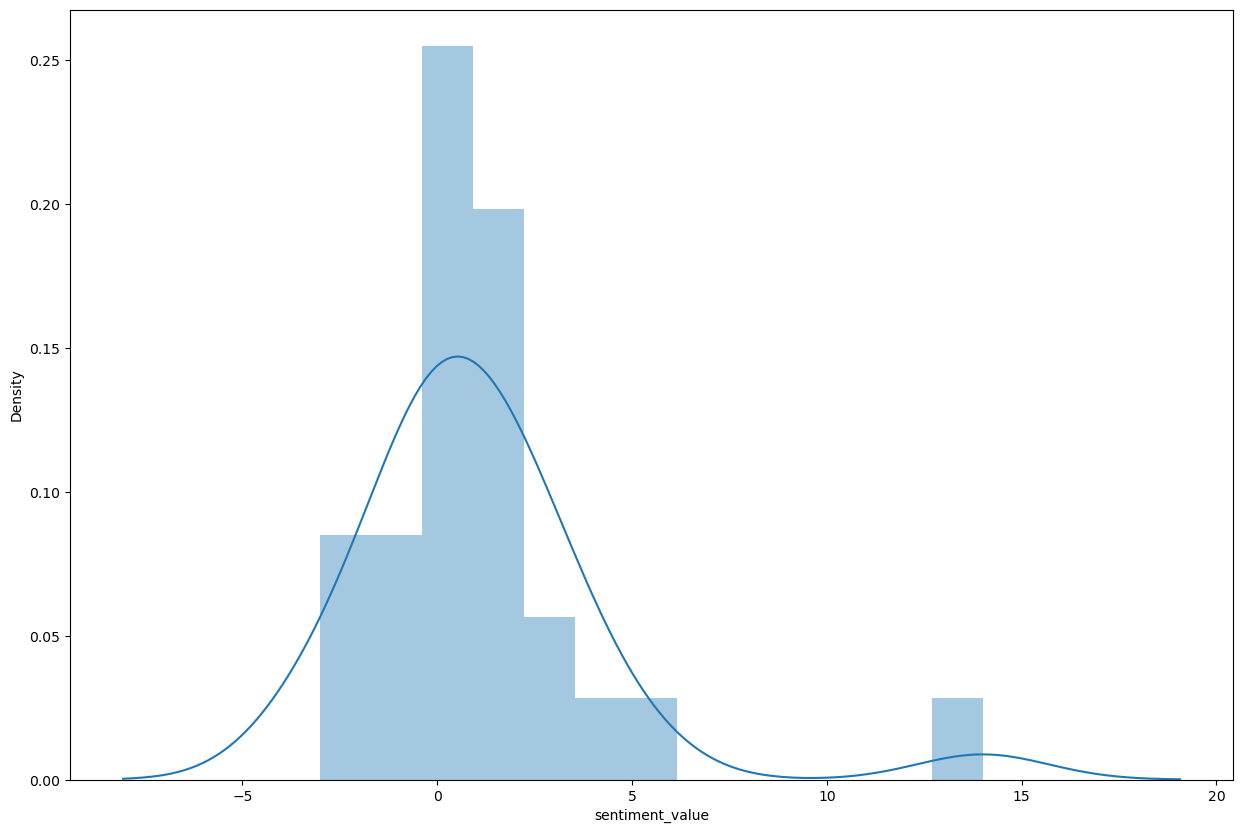

In [48]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

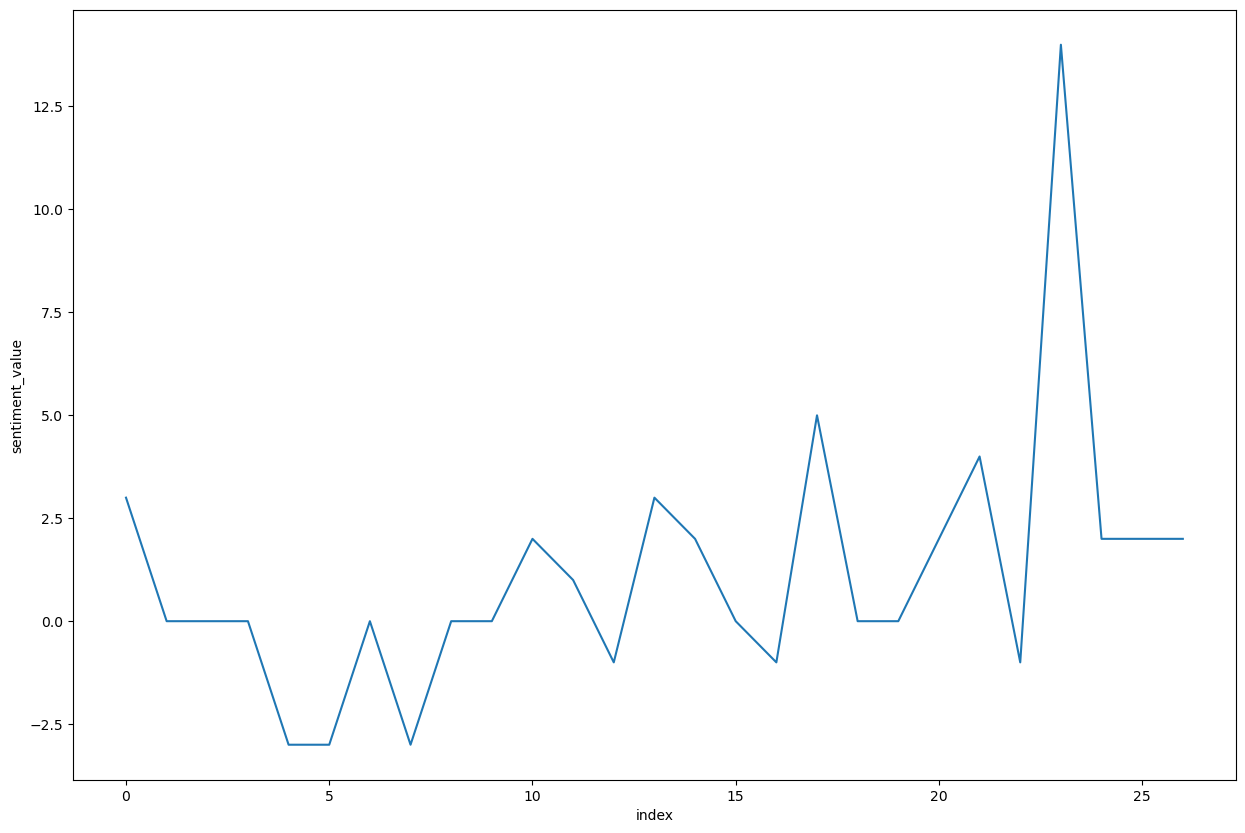

In [49]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)